In [1]:
import dgl
import dgl.data
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import scipy.sparse as sp
import torch
import torch.nn as nn
import scipy.io as sio
import random
import dgl

# Test dgl draw graph

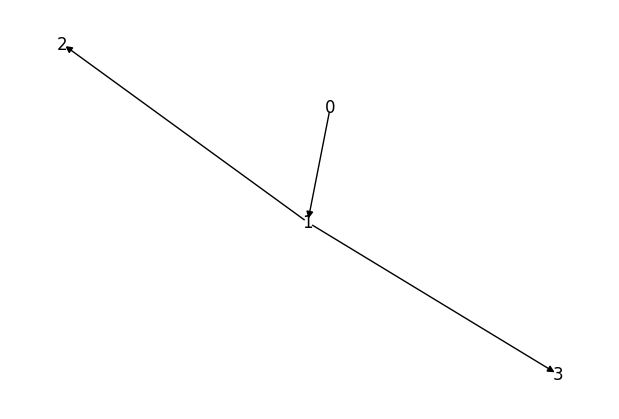

In [2]:
# dataset = dgl.data.CoraGraphDataset()
# test_graph = dataset[0]

graph_src = np.array([0, 1, 1], dtype=np.int32)
graph_dst = np.array([1, 2, 3], dtype=np.int32)
test_graph = dgl.graph((graph_src, graph_dst))

options = {
    'node_color': 'white',
    'node_size': 30,
    'width': 1,
    'with_labels': True
}
G = dgl.to_networkx(test_graph)
plt.figure(figsize=[6,4])
nx.draw(G, **options)

# Generate Testing Graph

In [8]:
N = 10
EdgeSelectRatio = 0.3

np.random.seed(10)

edge_pair = [(i // N, i % N) for i in range(N ** 2) if i // N > i % N]
selected_edges = np.array(edge_pair)[np.random.choice(np.arange(len(edge_pair)), size=int(EdgeSelectRatio * len(edge_pair)), replace=False)]
selected_edges = np.concatenate([selected_edges, selected_edges[:, ::-1]], axis=0)

graph = dgl.DGLGraph((selected_edges[:, 0], selected_edges[:, 1]))

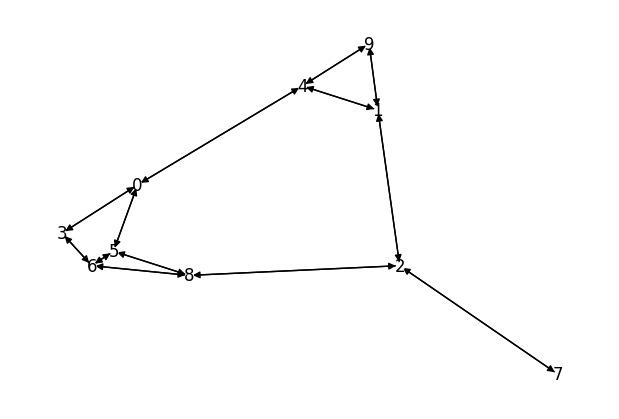

In [42]:
options = {
    'node_color': 'white',
    'node_size': 30,
    'width': 1,
    'with_labels': True
}
G_NWX = dgl.to_networkx(graph)
plt.figure(figsize=[6,4])
nx.draw_spectral(G_NWX, **options)

# TEST: Random walk with prob = 1

In [12]:
subgraph_size = 4

traces = dgl.contrib.sampling.random_walk_with_restart(
    graph, list(range(N)), 
    restart_prob=1, 
    max_nodes_per_seed=subgraph_size*3)

In [24]:
node_dict = {}
for i in range(len(traces)):
    trace = traces[i]
    node_set = set()
    for node in trace:
        node_set.add(node.item())
    node_dict[i] = node_set

In [25]:
node_start = 1
sampled_nodes = node_dict[node_start]

In [66]:
def draw_subgraph(G_NWX, node_start, sampled_nodes):
    node_color_map = []
    for node in range(len(G_NWX.nodes)):
        if node in sampled_nodes:
            node_color_map.append("pink")
        elif node == node_start:
            node_color_map.append("red")
        else: 
            node_color_map.append("white")
    subgraph_nodes = {node_start}
    for e in sampled_nodes:
        subgraph_nodes.add(e)
    edge_color_map = []
    for u, v in G_NWX.edges():
        if u in subgraph_nodes and v in subgraph_nodes:
            edge_color_map.append("salmon")
        else:
            edge_color_map.append("gray")
        
    options = {
        'node_color': 'white',
        'node_size': 30,
        'font_size': 8,
        'width': 1,
        'with_labels': True,
        'node_color': node_color_map,
        'edge_color': edge_color_map
    }
    nx.draw_spectral(G_NWX, **options)

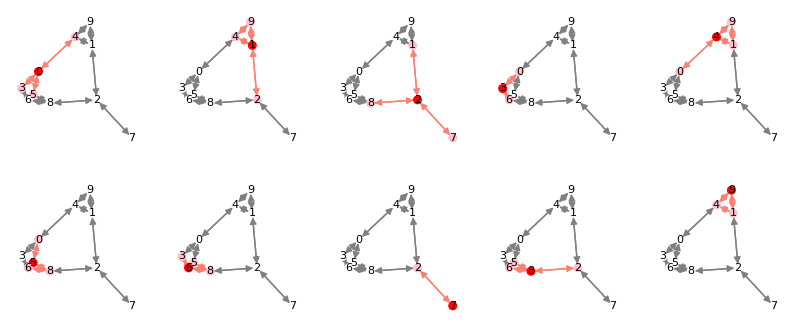

In [74]:
FIG_W = 5
FIG_H = 2
plt.figure(figsize=[2*FIG_W,2*FIG_H])

for node in range(N):
    plt.subplot(FIG_H, FIG_W, node + 1)
    draw_subgraph(G_NWX, node, node_dict[node])
plt.savefig("Random Sampling with restart_ratio=1", dpi=400)